<a href="https://colab.research.google.com/github/MariangelaPol/CaseStudies/blob/main/Customer_Orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General Checks

In [85]:
#insterting some important libraries for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
#inserting the dataset and checking the first rows
df = pd.read_csv('df.csv')
df.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [87]:
list(df.columns)

['Unnamed: 0', 'customer_email', 'net_revenue', 'year']

In [88]:
#change names
df.columns = ['Index', 'Email','Net_Revenue','Year']
df.head()

,Index,Email,Net_Revenue,Year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [89]:
#This dataset contains 685927 rows and 4 columns.
df.shape

(685927, 4)

In [90]:
#drop first column(index)
df = df.iloc[: , 1:]

In [91]:
#Find some valuable first inputs with one glance
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Net_Revenue,685927.0,125.647755,71.854528,1.0,63.51,125.73,187.82,250.0
Year,685927.0,2016.027252,0.837203,2015.0,2015.00,2016.00,2017.00,2017.0


In [92]:
#checking for null values
df.isnull().values.any()

False

In [93]:
#datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Email        685927 non-null  object 
 1   Net_Revenue  685927 non-null  float64
 2   Year         685927 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 15.7+ MB


In [94]:
df['Year'].value_counts()

2017    249987
2015    231294
2016    204646
Name: Year, dtype: int64

In [95]:
#1)Revenue for each year
df.groupby('Year').agg({'Net_Revenue': ['sum']})


,Net_Revenue
,sum
Year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


**Revenue for each year**

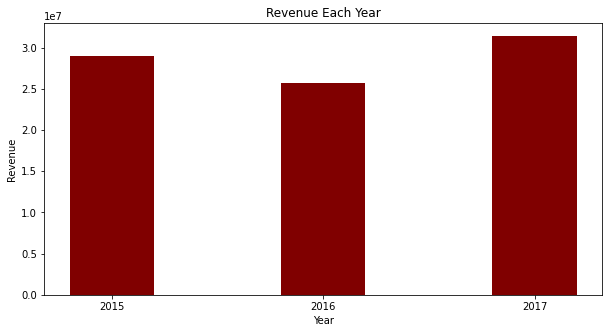

In [96]:
# creating the dataset
data = {'2015':29036749.19, '2016':25730943.59, '2017':31417495.03}
Year = list(data.keys())
Values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Year, Values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Revenue Each Year")
plt.grid(False)
plt.show()

In [97]:
#2)new customers Revenue
df1=df.loc[df['Year'] == 2015]
df2=df.loc[df['Year'] == 2016]
df3=df.loc[df['Year'] == 2017]

In [98]:
#python do not have an anti_join so we will create it
new_cust_2017 = df3.merge(df2, on='Email', how='left', indicator=True)  
df_2017 = new_cust_2017.loc[new_cust_2017['_merge'] == 'left_only', 'Email'] 
d_2017 = df3[df3['Email'].isin(df_2017)] 
New_Customers_R_2017 = d_2017['Net_Revenue'].sum()
#new customers for 2017
New_Customers_R_2017

28776235.039999995

In [99]:
new_cust_2016 = df2.merge(df1, on='Email', how='left', indicator=True)  
df_2017 = new_cust_2016.loc[new_cust_2016['_merge'] == 'left_only', 'Email'] 
d_2016 = df2[df2['Email'].isin(df_2017)] 
New_Customers_R_2016 = d_2016['Net_Revenue'].sum()
#same procedure: new customers for 2016
New_Customers_R_2016

18245491.01

**New Customers Revenue**

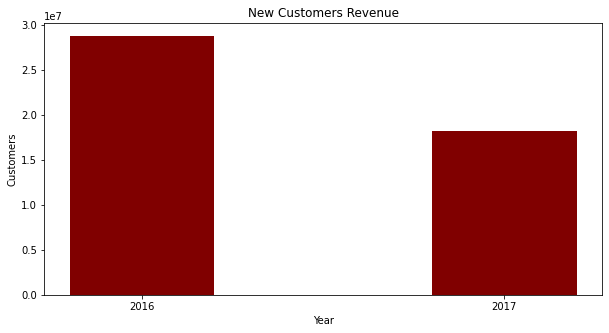

In [100]:
# creating the dataset
data = {'2016':28776235.039999995, '2017':18245491.01}
Year = list(data.keys())
Values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Year, Values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Customers")
plt.title("New Customers Revenue")
plt.grid(False)
plt.show()

In [101]:
#5,6)existing customer revenue
existing_c=pd.merge(df1,df2,on=['Email'],how="inner")

In [102]:
existing_customers_2016_year=existing_c['Net_Revenue_y'].sum()
existing_customers_2016_year

7485452.58

In [103]:
existing_customers=pd.merge(existing_c,df3,on=['Email'],how="inner")

In [104]:
existing_customers_2017_year=existing_customers['Net_Revenue'].sum()
existing_customers_2017_year

764387.7300000001

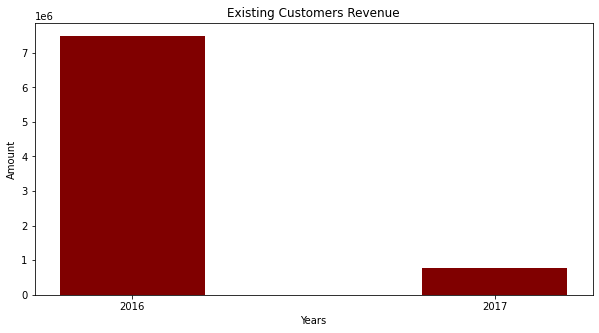

In [105]:
# creating the dataset
data = {'2016':7485452.58, '2017':764387.7300000001}
Year = list(data.keys())
Values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Year, Values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Years")
plt.ylabel("Amount")
plt.title("Existing Customers Revenue")
plt.grid(False)
plt.show()

In [106]:
#3)existing customer growth for 2017
Growth=existing_customers_2017_year-existing_customers_2016_year
Growth

-6721064.85

In [107]:
#7)Total Customers per year
df.groupby('Year').agg({'Net_Revenue': ['count']})


,Net_Revenue
,count
Year,
2015,231294
2016,204646
2017,249987


**Total Customers per Year**

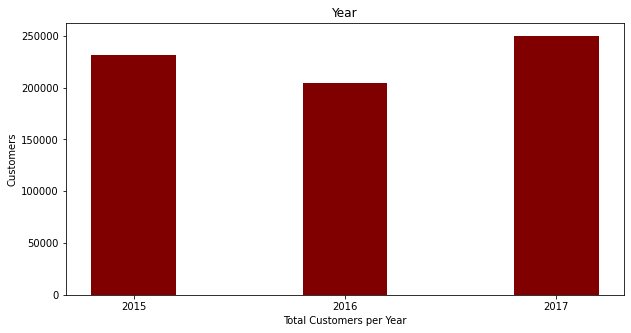

In [108]:
# creating the dataset
data = {'2015':231294, '2016':204646, '2017':249987}
Year = list(data.keys())
Values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Year, Values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Total Customers per Year")
plt.ylabel("Customers")
plt.title("Year")
plt.grid(False)
plt.show()

In [109]:
#8)Revenue per Customer for each year
df.groupby(['Year','Email']).agg({'Net_Revenue': ['sum']})


Net_Revenue
                                   sum
Year Email                            
2015  aaagldjgdt@gmail.com       44.72
      aaaicvtnzx@gmail.com       49.20
      aaaihliwuo@gmail.com      248.67
      aaaqpobaaa@gmail.com      126.83
      aaatyrafec@gmail.com       65.28
...                                ...
2017 zzzdnukepj@gmail.com        81.99
     zzzeehgitl@gmail.com        65.98
     zzzmkaruhf@gmail.com       202.77
     zzznqseiwv@gmail.com       162.24
     zzzoxtrfic@gmail.com        15.74

[685927 rows x 1 columns]

In [110]:
#8)New Customers per year
New_Customers_C_2016 = d_2016['Email'].count()
New_Customers_C_2016

145062

In [111]:
New_Customers_C_2017 = d_2017['Email'].count()
New_Customers_C_2017

229028

**New Customers per Year**

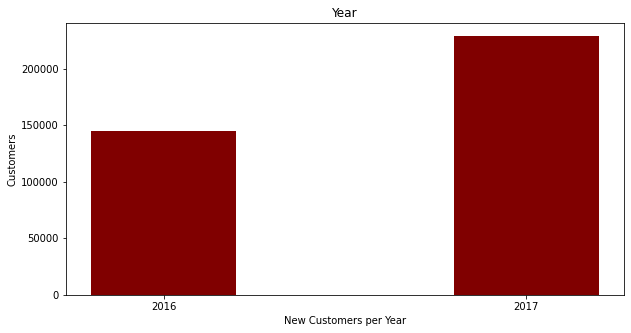

In [112]:
# creating the dataset
data = { '2016':145062, '2017':229028}
Year = list(data.keys())
Values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Year, Values, color ='maroon',
        width = 0.4)
 
plt.xlabel("New Customers per Year")
plt.ylabel("Customers")
plt.title("Year")
plt.grid(False)
plt.show()

In [113]:
#9)Lost Customers 2017

#anti_join
new_cust_2017_l = df2.merge(df3, on='Email', how='left', indicator=True)  
df_2017_l = new_cust_2017_l.loc[new_cust_2017_l['_merge'] == 'left_only', 'Email'] 
d_2017_l = df2[df2['Email'].isin(df_2017_l)] 
L_Customers_c_2017 = d_2017_l['Email'].count()
L_Customers_c_2017

183687

In [114]:
#Lost Customers 2016

#anti_join
new_cust_2016_l = df1.merge(df2, on='Email', how='left', indicator=True)  
df_2016_l = new_cust_2016_l.loc[new_cust_2016_l['_merge'] == 'left_only', 'Email'] 
d_2016_l = df1[df1['Email'].isin(df_2016_l)] 
L_Customers_c_2017 = d_2016_l['Email'].count()
L_Customers_c_2017

171710

**Lost Customers**

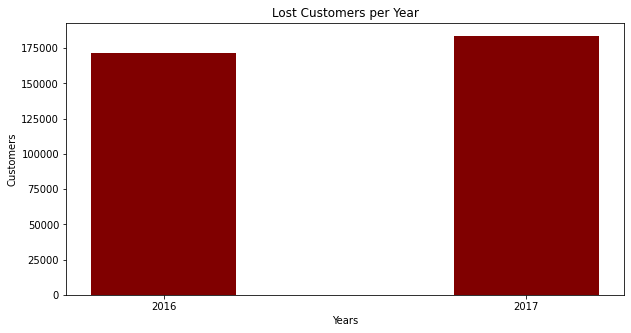

In [115]:
# creating the dataset
data = { '2016':171710, '2017':183687}
Year = list(data.keys())
Values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Year, Values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Years")
plt.ylabel("Customers")
plt.title("Lost Customers per Year")
plt.grid(False)
plt.show()

**all visuals are in the .pdf file: This file is an export from PowerBI**